In [69]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
import pandas as pd
import openpyxl
import scipy.optimize

from scipy.stats import norm
from scipy.stats import t
from scipy.stats import chi2

# Refracción de microondas

In [70]:
def Minimos_cuadrados(x,y,n=1):
    l = x.shape[0]
    b = y
    
    A = np.ones((l,n+1))
    
    for i in range(1,n+1):
        A[:,i] = x**i
        
    AT = np.dot(A.T,A)
    bT = np.dot(A.T,b)

    xsol = np.linalg.solve(AT,bT)
    
    return xsol

def GetModel(x,p):
    
    y = 0.
    for i in range(len(p)):
        y += p[i]*x**i
        
    return y

def GetError(x,y,p,n=1):
    
    l = x.shape[0]
    
    A = np.ones((l,n+1))
    
    for i in range(1,n+1):
        A[:,i] = x**i
        
    # Residuos
    R = y - np.dot(A,p)
    
    sigma2 = np.dot(R.T,R)/(len(y)-len(p))
    
    Cov = sigma2*np.linalg.inv(np.dot(A.T,A))
    
    R2 = None
    if np.shape(Cov) == (2,2):
        R2 = (Cov[0][1]**2)/(Cov[0][0]*Cov[1][1])

    return (Cov,R2,R)

def Get_sigma(Cov):
    sigmaai = np.sqrt(np.diagonal(Cov))
    return sigmaai[::-1]

def Error_relativo(X_real,X_exp):
    return (np.abs(X_exp - X_real)/X_real)

def presicion(d,v):
    p = (d/v)
    if p <= 0.1:
        return p,True
    else:
        return p,False
    
def exactitud(xr,xm,d):
    e = (np.abs(xr-xm))
    if e <= (2.5*d):
        return e/d,True
    else:
        return e/d,False

X = sym.Symbol('x',real=True)
Y = sym.Symbol('y',real=True)

# Datos

In [71]:
wb = openpyxl.load_workbook(r"C:\Users\ASUS\OneDrive\Uniandes\Física\Ondas y Fluidos\Lab_OyF\Microondas 2/experimento 11.xlsx")
datos = pd.read_excel(io = r"C:\Users\ASUS\OneDrive\Uniandes\Física\Ondas y Fluidos\Lab_OyF\Microondas 2/experimento 11.xlsx", header=0,sheet_name='Hoja1',names=None,index_col=None,usecols='A:H',engine='openpyxl')
print(datos.head())

   1 rendija  Unnamed: 1      Unnamed: 2  Unnamed: 3  Unnamed: 4  2 rendijas  \
0         NaN      grado  amplitd microA         NaN         NaN         NaN   
1         NaN        -15              30         NaN         NaN         NaN   
2         NaN        -14              31         NaN         NaN         NaN   
3         NaN        -13              31         NaN         NaN         NaN   
4         NaN        -12              31         NaN         NaN         NaN   

  Unnamed: 6       Unnamed: 7  
0      grdos  amplitud microA  
1          0               43  
2          5               33  
3         10               15  
4         15                0  


In [72]:
datos_ = datos.values
datos_np = np.float64(np.transpose(datos_[1:,:]))

- 1 rendija:

In [73]:
grados = datos_np[1]*(np.pi/180)
Amplitud = datos_np[2]
a = 2.5*(10**(-2)) #m
x1 = np.pi*a*np.sin(grados)
x1

array([-0.0203276 , -0.0190005 , -0.01766761, -0.01632935, -0.0149861 ,
       -0.0136383 , -0.01228633, -0.01093063, -0.0095716 , -0.00820965,
       -0.0068452 , -0.00547866, -0.00411046, -0.002741  , -0.00137071,
        0.        ,  0.00137071,  0.002741  ,  0.00411046,  0.00547866,
        0.0068452 ,  0.00820965,  0.0095716 ,  0.01093063,  0.01228633,
        0.0136383 ,  0.0149861 ,  0.01632935,  0.01766761,  0.0190005 ,
        0.0203276 ])

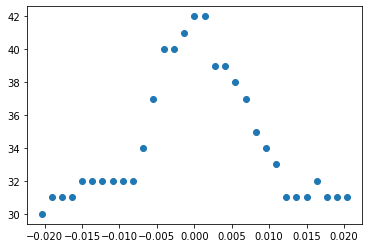

In [74]:
plt.scatter(x1,Amplitud)

def I(x,I0,lamb): return ((I0*(lamb**2))/(x**2))*(np.sin(x/lamb)**2)
popt,pcov = scipy.optimize.curve_fit(I,x1,Amplitud)
I0,lamb = popt
fitfunc = lambda x: ((I0*(lamb**2))/(x**2))*(np.sin(x/lamb)**2)

def I(x,I0,lamb): return I0*((np.sin(x/lamb))/(x/lamb))**2
popt,pcov = scipy.optimize.curve_fit(I,x1,Amplitud)
I0,lamb = popt
fitfunc = lambda x: I0*((np.sin(x/lamb))/(x/lamb))**2

- 2 rendijas:

In [75]:
grados2 = datos_np[6]*(np.pi/180)
Amplitud2 = datos_np[7]
x2 = np.pi*a*np.sin(grados2)
x2

array([0.        , 0.0068452 , 0.0136383 , 0.0203276 , 0.0268622 ,
       0.03319236, 0.03926991, 0.04504859, 0.05048442, 0.05553604,
       0.06016499, 0.06433605, 0.06801748, 0.07118125, 0.07380329,
       0.07586364, 0.07734662,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan])

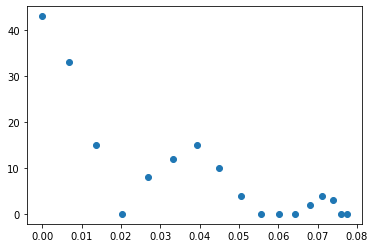

In [76]:
plt.scatter(x2,Amplitud2)